# Intrusion and Detection Evalution (Using Simple Auto Encoder)

The NSL-KDD dataset is an enhanced version of the KDD Cup 1999 dataset, aimed at improving the issues found in the original dataset. It consists of four main files: KDDTrain+, KDDTrain+_20Percent, KDDTest+, and KDDTest-21. These files contain a total of 41 features, including basic features (such as duration and protocol type), content features (such as number of failed logins), and traffic features (such as count of connections to the same host). Additionally, each record is labeled as either normal or as one of several types of attacks, categorized into four major groups: DoS (Denial of Service), R2L (Remote to Local), U2R (User to Root), and Probe. The dataset includes improvements such as the removal of redundant records, ensuring a more balanced distribution of different attack types, and making it more representative for network intrusion detection system research. The NSL-KDD dataset is widely used for evaluating intrusion detection systems due to its reduced size and enhanced quality.

The following are the different Libraries that we can used to evalute and train our model 

In [155]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn as sk 
import tensorflow as tf 
from tensorflow.keras.layers import Input, Dense  
import seaborn as sns 

%matplotlib notebook 
%matplotlib inline 
%matplotlib widget
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import confusion_matrix, f1_score, precision_score, accuracy_score, recall_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import OneHotEncoder, LabelEncoder


from keras.models import Model
from keras.optimizers import Adam
from keras.regularizers import L1



Here we can import the two datasets. One is the training dataset and other is the testing dataset for checking the performance of model. 
Both datasets having different samples. 

Here is the Traing dataset having no columns names. 

In [156]:
Training_df=pd.read_csv("KDDTrain+.txt")
Testing_df=pd.read_csv("KDDTest+.txt")
Training_df.head(5)

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [157]:
Testing_df.head(5)

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


Here is the table of testing dataset hvaing no columns names.

Testing_df.head(5)

In [158]:
Training_df.columns

Index(['0', 'tcp', 'ftp_data', 'SF', '491', '0.1', '0.2', '0.3', '0.4', '0.5',
       '0.6', '0.7', '0.8', '0.9', '0.10', '0.11', '0.12', '0.13', '0.14',
       '0.15', '0.16', '0.18', '2', '2.1', '0.00', '0.00.1', '0.00.2',
       '0.00.3', '1.00', '0.00.4', '0.00.5', '150', '25', '0.17', '0.03',
       '0.17.1', '0.00.6', '0.00.7', '0.00.8', '0.05', '0.00.9', 'normal',
       '20'],
      dtype='object')

Here are the names of the columns

In [159]:
 columns = [
    'duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'outcome',
    'difficulty'
]
    
Training_df.columns = columns
Testing_df.columns= columns

In [160]:
Training_df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,difficulty
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [161]:
Training_df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [162]:
#Length of data is:
print("Length of the training dataset is:",len(Training_df))
print("Number of columns in the traing dataset is:",Training_df.shape[1])

Length of the training dataset is: 125972
Number of columns in the traing dataset is: 43


In [163]:
#Length of data is:
print("Length of the testing dataset is:",len(Testing_df))
print("Number of columns in the testing dataset is:",Testing_df.shape[1])

Length of the testing dataset is: 22543
Number of columns in the testing dataset is: 43


# Apply The Preprocessing Techniques
1) Checking for the Null values in the dataset
2) Perform Imputation
3) Normalize the Whole dataset
4) perform Encoding 

Checking for Null values in the Dataset

In [164]:
#Now we can perform the data preprocessing...
#check the missing values in the dataset..
#so there is no column having null values 
print("Columns with missing values in training set:",Training_df.columns[Training_df.isnull().any()].tolist())
print("Columns with missing values in testing set:",Testing_df.columns[Testing_df.isnull().any()].tolist())

Columns with missing values in training set: []
Columns with missing values in testing set: []


Perform One Hot Encoding to convert the data into Numerical types of data 

In [165]:

# One-hot encode categorical variables
Training_df = pd.get_dummies(Training_df, columns=["protocol_type", "service", "flag"], dtype=np.int64)
Testing_df = pd.get_dummies(Testing_df, columns=["protocol_type", "service", "flag"], dtype=np.int64)
Training_df.head(5)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [166]:
Training_df.dtypes

duration          int64
src_bytes         int64
dst_bytes         int64
land              int64
wrong_fragment    int64
                  ...  
flag_S1           int64
flag_S2           int64
flag_S3           int64
flag_SF           int64
flag_SH           int64
Length: 124, dtype: object

Perform Normalization to set the data.
Technique that i want to use is MinMaxScaler

In [167]:

#this can reindex the testing df  to ensure that the number of columns for traing and testing are same
Testing_df = Testing_df.reindex(columns=Training_df.columns, fill_value=0)
# Normalize all numeric columns
numeric_columns = Training_df.select_dtypes(include=[np.number]).columns.tolist()
min_max_scaler = MinMaxScaler()

Training_df[numeric_columns] = min_max_scaler.fit_transform(Training_df[numeric_columns])
Testing_df[numeric_columns] = min_max_scaler.transform(Testing_df[numeric_columns])

Training_df.head(5)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Structure of Our model

The following are the number of layers and nodes to train and test our single auto encoder 
1) There are two hidden layer in the Encoder having 140 (nodes for the first layer) and 100(for the second layers).
2) The Latent space having 50 nodes to compress the data and extract useful features.
3) Decoder having two hidden layer with 100 and 140 neurons for the first and second layer respectively 

In [168]:
#this is a two dimensional dataset..
Input_size=Training_df.shape[1]
Layer_1_length=140
Layer_2_length=100
Latent_Layer_size=50

In [169]:
# Convert DataFrame to NumPy array 
Training_data = Training_df.values
Input_data=Input(shape=(Input_size,))

# Activation functions

Activation function that I had used in the internal layer is "Relu" while in the external layer i had used "Sigmoid" function
because of the data which is normalize between 0 and 1

Train our models with 5 epochs, using Adam optimizer because of multiple classess and cross entropy as loss function 
with the batch size 32 and splitting validation dataset as 0.2

In [170]:


# Separate features and target
X_train = Training_df.drop(columns=['outcome', 'difficulty'])
y_train = Training_df['outcome']

X_test = Testing_df.drop(columns=['outcome', 'difficulty'])
y_test = Testing_df['outcome']

# Verify the input shapes
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

# Define the autoencoder model parameters
Input_size = X_train.shape[1]
Layer_1_length = 120
Layer_2_length = 80
Latent_Layer_size = 30

# Build the autoencoder model
Input_data = Input(shape=(Input_size,))
Encoder_Layer_1 = Dense(Layer_1_length, activation="relu")(Input_data)
Encoder_Layer_2 = Dense(Layer_2_length, activation="relu")(Encoder_Layer_1)
Latent_layer = Dense(Latent_Layer_size, activation="relu")(Encoder_Layer_2)
Decoder_Layer_1 = Dense(Layer_1_length, activation="relu")(Latent_layer)
Decoder_Layer_2 = Dense(Layer_2_length, activation="relu")(Decoder_Layer_1)
Output_layer = Dense(Input_size, activation="sigmoid")(Decoder_Layer_2)

# Compile the model
Simple_AutoEncoder = Model(Input_data, Output_layer)
Simple_AutoEncoder.compile(optimizer="Adam", loss="binary_crossentropy")

# Train the model
Simple_AutoEncoder.fit(X_train, X_train, epochs=5, batch_size=32, validation_split=0.2)


Shape of X_train: (125972, 122)
Shape of X_test: (22543, 122)
Epoch 1/5
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 0.0641 - val_loss: 0.0164
Epoch 2/5
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0156 - val_loss: 0.0150
Epoch 3/5
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0147 - val_loss: 0.0145
Epoch 4/5
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0144 - val_loss: 0.0144
Epoch 5/5
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0142 - val_loss: 0.0142


# Calculation of Reconstruction error
Finding Reconstruction error give a lot of information about model that transform the intput set of features into latent 
space and then find the output from the latent space having reduce number of features to prdouce the output.
The less the the reconstructioon error the more the model can predict well.

In [171]:

Obtain_train_Reconstruction = Simple_AutoEncoder.predict(X_train)
Obtain_test_Reconstruction = Simple_AutoEncoder.predict(X_test)

Training_Reconstruction_error = np.mean(np.square(X_train - Obtain_train_Reconstruction), axis=1)

# Convert to DataFrame for easier handling
Train_Rec_Error_Df = pd.DataFrame({'reconstruction_Training_error': Training_Reconstruction_error})


3937/3937 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:

Testing_Reconstruction_error = np.mean(np.square(X_test - Obtain_test_Reconstruction), axis=1)
# Convert to DataFrame for easier handling
Testing_Rec_Error_Df = pd.DataFrame({'reconstruction_Testing_error': Testing_Reconstruction_error})


# PLot Histogram to visualize the training and testing Reconstruction Error.
The x_axises give result of the error and vertical axises give result that how much 
samples does this errors

<IPython.core.display.Javascript object>


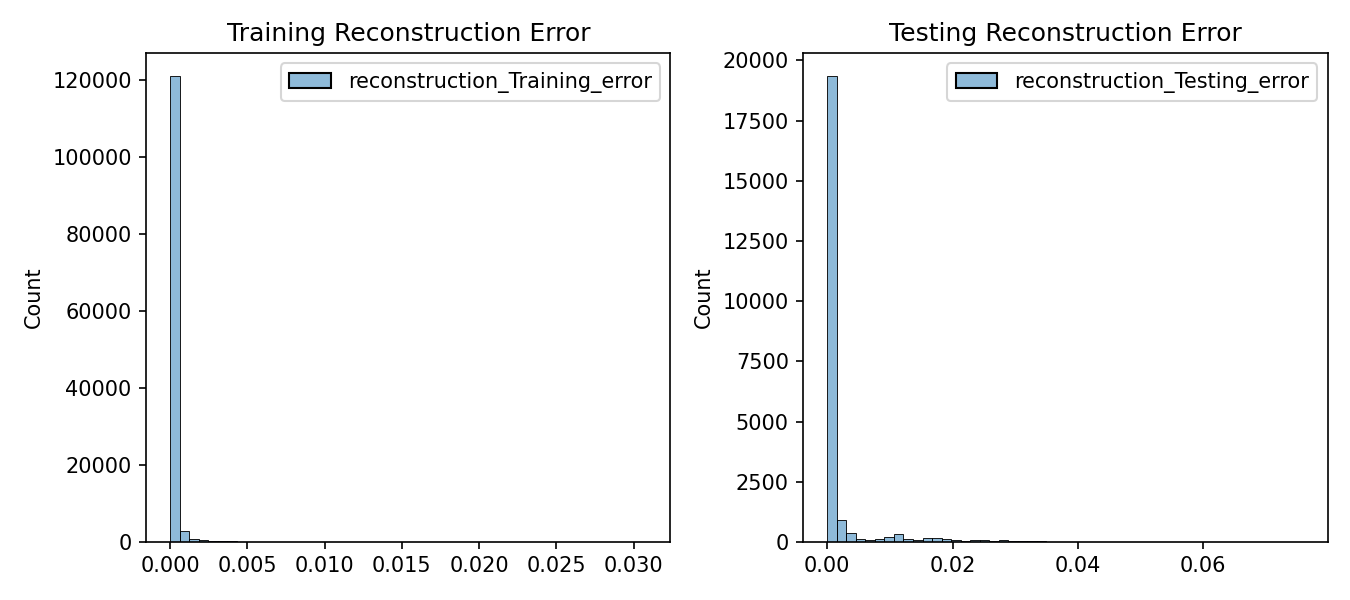

In [172]:
# Plotting histograms to visualize the reconstruction errors
plt.figure(figsize=(9, 4))

plt.subplot(1, 2, 1)
sns.histplot(Train_Rec_Error_Df, bins=50, color='red')
plt.title('Training Reconstruction Error')

plt.subplot(1, 2, 2)
sns.histplot(Testing_Rec_Error_Df, bins=50)
plt.title('Testing Reconstruction Error')

# Display the plots
plt.tight_layout()
plt.show()

# Finding The Outliers using Percentile and Isolation forest

In [173]:

# Identify and analyze outliers
threshold = np.percentile(Training_Reconstruction_error, 95)

# Analyze the outliers in the whole testing dataset
outliers = Testing_Rec_Error_Df[Testing_Rec_Error_Df["reconstruction_Testing_error"] > threshold]

print("Number of outliers detected in test dataset:", len(outliers))

Number of outliers detected in test dataset: 4244


# Isolation Forest for Outliers
Since the percentile give a lot of outliers because the dataset are bias and non uniform. Since the dataset contain samples
such that the number of normal samples are much more than the abnormal samples. So There are a lot of outliers in the dataset.
The dataset contain samples that used as normal while there are few other samples that have been 
used for attacting purpose.
so here because of the biasness in the dataset, so we can,t use the z score, percentile and boxplot.
so here we can use the Isolation Forest for detection outliers 

The following are the terms that have been used to check the performance of the model
1) Accuarcy 
2) Precision
3) Recall
4) Confusion matrix

Training Data Evaluation:
Accuracy: 0.5550281014828692
Precision: 0.7047043865225684
Recall: 0.07562681221217807
F1 Score: 0.13659468285018947
Confusion Matrix:
 [[65484  1858]
 [54196  4434]]

Testing Data Evaluation:
Accuracy: 0.5065874107261678
Precision: 0.9287506271951831
Recall: 0.14424875311720697
F1 Score: 0.24971332209106237
Confusion Matrix:
 [[ 9569   142]
 [10981  1851]]


<IPython.core.display.Javascript object>


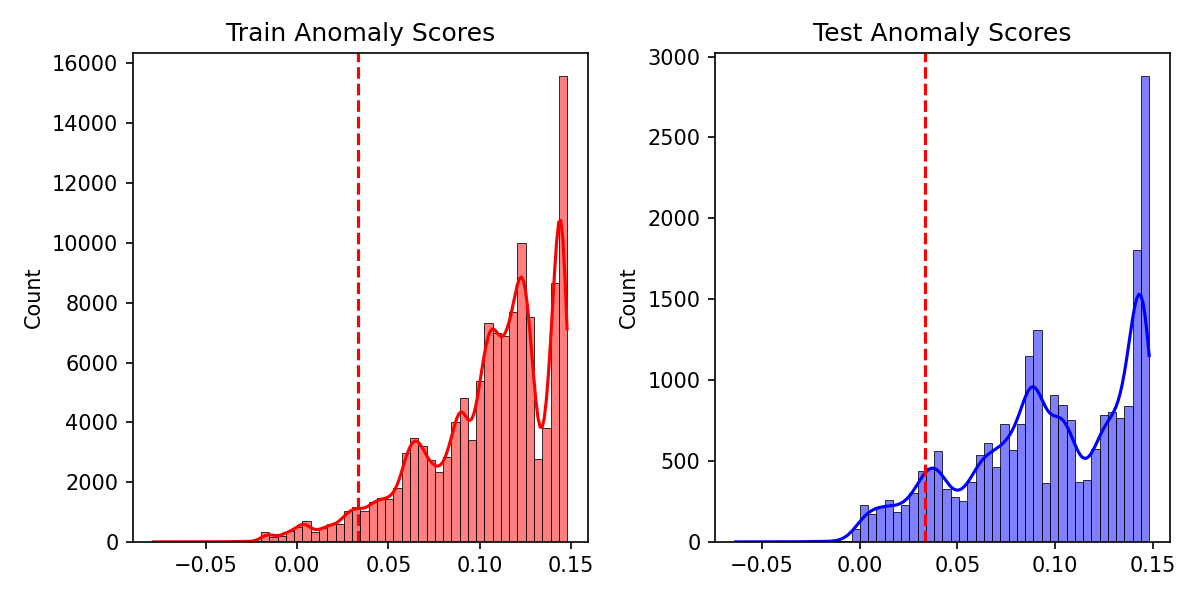

In [174]:
from sklearn.ensemble import IsolationForest

# Train Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
iso_forest.fit(X_train)

# Predict anomaly scores
train_scores = iso_forest.decision_function(X_train)
test_scores = iso_forest.decision_function(X_test)

# Calculate threshold using the 5th percentile
threshold = np.percentile(train_scores, 5)

# Classify anomalies
train_predictions = (train_scores < threshold).astype(int)
test_predictions = (test_scores < threshold).astype(int)

# Convert 'outcome' to binary (normal=0, anomaly=1) for evaluation
y_train_binary = y_train.apply(lambda x: 1 if x != 'normal' else 0)
y_test_binary = y_test.apply(lambda x: 1 if x != 'normal' else 0)

# Evaluate the results
print("Training Data Evaluation:")
print("Accuracy:", accuracy_score(y_train_binary, train_predictions))
print("Precision:", precision_score(y_train_binary, train_predictions))
print("Recall:", recall_score(y_train_binary, train_predictions))
print("F1 Score:", f1_score(y_train_binary, train_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_train_binary, train_predictions))

print("\nTesting Data Evaluation:")
print("Accuracy:", accuracy_score(y_test_binary, test_predictions))
print("Precision:", precision_score(y_test_binary, test_predictions))
print("Recall:", recall_score(y_test_binary, test_predictions))
print("F1 Score:", f1_score(y_test_binary, test_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test_binary, test_predictions))

# Plotting histograms to visualize the anomaly scores
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.histplot(train_scores, bins=50, kde=True, color="red")
plt.axvline(x=threshold, color='r', linestyle='--')
plt.title('Train Anomaly Scores')

plt.subplot(1, 2, 2)
sns.histplot(test_scores, bins=50, kde=True, color="blue")
plt.axvline(x=threshold, color='r', linestyle='--')
plt.title('Test Anomaly Scores')

plt.tight_layout()
plt.show()